In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from config_lightcurves import *

/home/rcarrasco/miniconda3/envs/my_python/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# data = h5py.File(save_path+file_name+".hdf5", "r")
data = h5py.File("/home/rcarrasco/simulated_data/lightcurves/ztf_no_sn10.hdf5", "r")

In [3]:
print("---- Fields ----")
print(list(data.keys()))
print("---- keys per field ----")
print(list(data["Field01"].keys()))

---- Fields ----
['Field01', 'Field02', 'Field03', 'Field04', 'Field05', 'Field06', 'Field07', 'Field08', 'Field09', 'Field10', 'Field11', 'Field12', 'Field13', 'Field14', 'Field15', 'Field17', 'Field18', 'Field19', 'Field20', 'Field21', 'Field22', 'Field23', 'Field24', 'Field25', 'Field26', 'Field27', 'Field28', 'Field29', 'Field30', 'Field32', 'Field33', 'Field34', 'Field35', 'Field36', 'Field38', 'Field39', 'Field40', 'Field41', 'Field43', 'Field44']
---- keys per field ----
['labels', 'lc_id', 'lc_type', 'lightcurves', 'limmag', 'n_lc_per_type', 'obs_days']


In [4]:
def plot_field_data(field_data, field_name, n_examples=5):
    field_keys = list(field_data.keys())
    classes = list(list(field_data["n_lc_per_type"].keys()))
    print("classes: "+str(classes))
    class_colors = {}
    for i, cl in enumerate(classes):
        print("n_lc class "+cl+": "+str(field_data["n_lc_per_type"][cl][()]))
        class_colors[cl] = "o-C"+str(i)
    lc_type = field_data["lc_type"][:]
    lightcurves = field_data["lightcurves"]["g"][:]
    limmag = field_data["limmag"]["g"][:]
    obs_days = field_data["obs_days"]["g"][:]
    print("labels shape: "+str(field_data["labels"].shape))
    print("example: "+str(field_data["labels"][:n_examples]))
    print("lc_id shape: "+str(field_data["lc_id"].shape))
    print("example: "+str(field_data["lc_id"][:n_examples]))
    print("lc_type shape: "+str(lc_type.shape))
    print("example: "+str(field_data["lc_type"][:n_examples]))
    
    # Plot examples
    plotted_examples = []
    plt.figure(figsize=(12, 7))
    for i in range(n_examples):
        lc = lightcurves[i, :]
        current_type = lc_type[i]
        if current_type in plotted_examples:
            plt.plot(obs_days, lc, class_colors[current_type])
        else:
            plt.plot(obs_days, lc, class_colors[current_type], label=current_type)
            plotted_examples.append(current_type)
    plt.plot(obs_days, limmag, "o--C7", label="limmag")
    plt.legend()
    plt.ylim([28, 16])
    plt.show()

    # Plot distribution
    plt.figure(figsize=(12, 7))
    lc_per_class = {}
    distr_per_class = {}
    bins = np.linspace(14, 28, 50)
    for i, cl in enumerate(classes):
        print(cl)
        if cl == "EmptyLightCurve":
            continue
        elif str(cl) in str(["Asteroids, Supernovae"]):
            lc_per_class[cl] = lightcurves[np.where(lc_type == cl)[0], :]
            aux_distr, _ = np.histogram(np.amin(lc_per_class[cl], axis=1), bins=bins, density=True)
            plt.plot(bins[1:], aux_distr, label=cl)
        else:
            lc_per_class[cl] = lightcurves[np.where(lc_type == cl)[0], :]
            aux_distr, _ = np.histogram(np.mean(lc_per_class[cl], axis=1), bins=bins, density=True)
            plt.plot(bins[1:], aux_distr, label=cl)
    plt.xlabel("Magnitude", fontsize=16)
    plt.title(field_name, fontsize=16)
    plt.axvline(x=np.mean(limmag), color='C7', linestyle='-', label="av limmag")
    plt.axvline(x=np.mean(limmag)-np.std(limmag), color='C7', linestyle='--', label="1std limmag")
    plt.axvline(x=np.mean(limmag)+np.std(limmag), color='C7', linestyle='--')
    plt.axvline(x=np.mean(limmag)+2*np.std(limmag), color='C7', linestyle=':', label="2std limmag")
    plt.axvline(x=np.mean(limmag)-2*np.std(limmag), color='C7', linestyle=':')
    plt.axvline(x=np.mean(limmag)+n_std_limmag*np.std(limmag), color="k", linestyle="-.", label="distr limmit")
    plt.legend()
    plt.show()
    
    plt.close("all")
    

In [5]:
fields = list(data.keys())
for field in fields:
    print("----- "+field+" -----")
    obs_days = data[field]["obs_days"]["g"][:]
    #print(len(obs_days))
    diff_obs_days = np.diff(obs_days)
    print("Highest cadence: ")
    print(str(np.sort(diff_obs_days)[:5]*24*60*60))
    print(str(np.amin(diff_obs_days))+" days")
    print(str(np.amin(diff_obs_days)*24*60)+ " min")
    print(str(np.amin(diff_obs_days)*24*60*60)+ " sec")
    print("5 highest cadence in sec")
    #print([diff_obs_days)))])

----- Field01 -----
Highest cadence: 
[253640.9980461  255801.00672841 257088.99744898 264182.99904317
 264570.99553049]
2.9356596996076405 days
4227.349967435002 min
253640.99804610014 sec
5 highest cadence in sec
----- Field02 -----
Highest cadence: 
[   288.00576031   1491.99838489   2334.00093913  17621.00355774
 247800.00381768]
0.0033334000036120415 days
4.80009600520134 min
288.0057603120804 sec
5 highest cadence in sec
----- Field03 -----
Highest cadence: 
[  1980.00289947   3053.9980799  251846.99711502 257088.99744898
 257712.00191528]
0.02291670022532344 days
33.00004832446575 min
1980.002899467945 sec
5 highest cadence in sec
----- Field04 -----
Highest cadence: 
[   1510.0041613   264577.00028569  346094.00061965 1205932.00034201]
0.01747690001502633 days
25.166736021637917 min
1510.004161298275 sec
5 highest cadence in sec
----- Field05 -----
Highest cadence: 
[ 121.99680358 1576.99872851 1826.99713111 2116.99869633 2342.0015797 ]
0.0014120000414550304 days
2.033280059695

----- Field01 -----
classes: ['Asteroids', 'EclipsingBinaries', 'EmptyLightCurve', 'M33Cepheids', 'NonVariable', 'RRLyrae']
n_lc class Asteroids: 10
n_lc class EclipsingBinaries: 10
n_lc class EmptyLightCurve: 10
n_lc class M33Cepheids: 10
n_lc class NonVariable: 10
n_lc class RRLyrae: 10
labels shape: (60,)
example: [3. 3. 0. 0. 3. 0.]
lc_id shape: (60,)
example: [0 1 2 3 4 5]
lc_type shape: (60,)
example: ['NonVariable' 'NonVariable' 'RRLyrae' 'RRLyrae' 'NonVariable' 'RRLyrae']


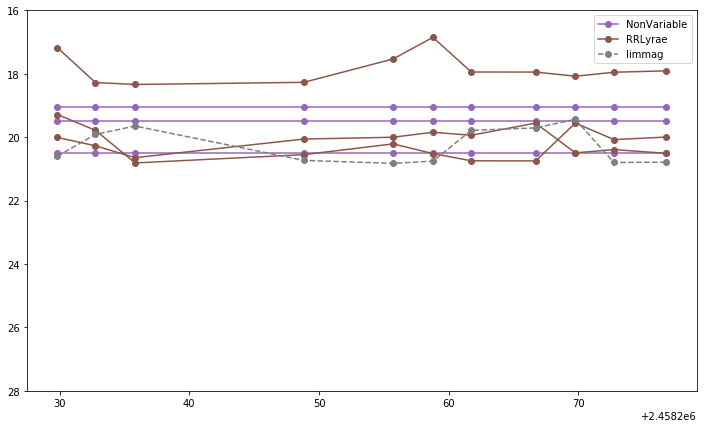

Asteroids
EclipsingBinaries
EmptyLightCurve
M33Cepheids
NonVariable
RRLyrae


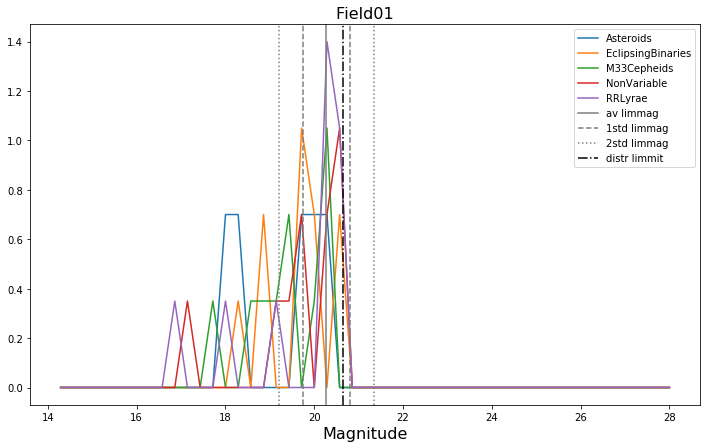

----- Field02 -----
classes: ['Asteroids', 'EclipsingBinaries', 'EmptyLightCurve', 'M33Cepheids', 'NonVariable', 'RRLyrae']
n_lc class Asteroids: 10
n_lc class EclipsingBinaries: 10
n_lc class EmptyLightCurve: 10
n_lc class M33Cepheids: 10
n_lc class NonVariable: 10
n_lc class RRLyrae: 10
labels shape: (60,)
example: [3. 4. 3. 1. 4. 0.]
lc_id shape: (60,)
example: [0 1 2 3 4 5]
lc_type shape: (60,)
example: ['NonVariable' 'EmptyLightCurve' 'NonVariable' 'M33Cepheids'
 'EmptyLightCurve' 'RRLyrae']


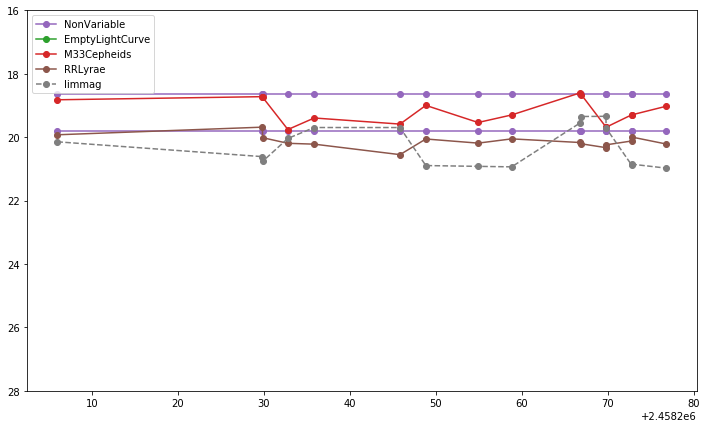

Asteroids
EclipsingBinaries
EmptyLightCurve
M33Cepheids
NonVariable
RRLyrae


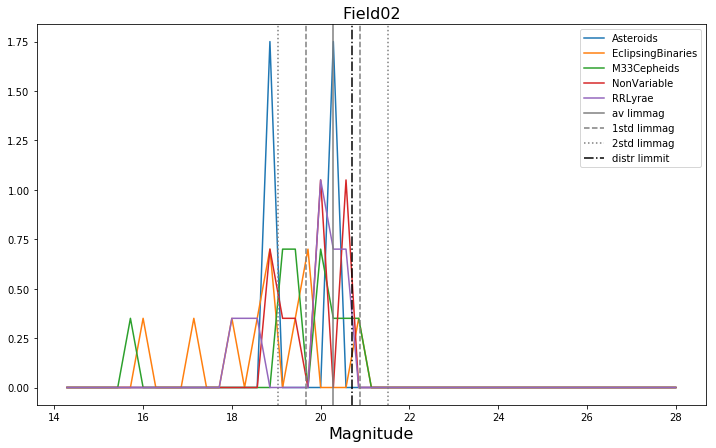

----- Field03 -----
classes: ['Asteroids', 'EclipsingBinaries', 'EmptyLightCurve', 'M33Cepheids', 'NonVariable', 'RRLyrae']
n_lc class Asteroids: 10
n_lc class EclipsingBinaries: 10
n_lc class EmptyLightCurve: 10
n_lc class M33Cepheids: 10
n_lc class NonVariable: 10
n_lc class RRLyrae: 10
labels shape: (60,)
example: [2. 5. 2. 5. 5. 2.]
lc_id shape: (60,)
example: [0 1 2 3 4 5]
lc_type shape: (60,)
example: ['EclipsingBinaries' 'Asteroids' 'EclipsingBinaries' 'Asteroids'
 'Asteroids' 'EclipsingBinaries']


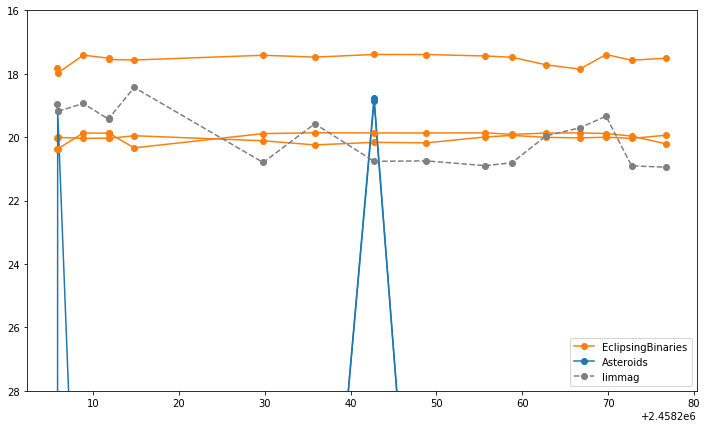

Asteroids
EclipsingBinaries
EmptyLightCurve
M33Cepheids
NonVariable
RRLyrae


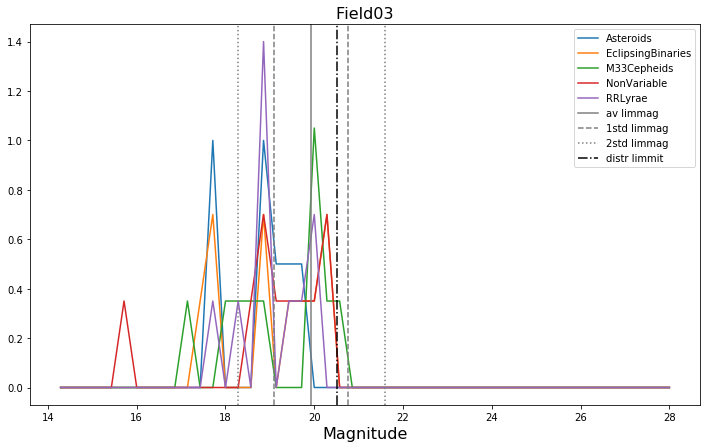

----- Field04 -----
classes: ['Asteroids', 'EclipsingBinaries', 'EmptyLightCurve', 'M33Cepheids', 'NonVariable', 'RRLyrae']
n_lc class Asteroids: 10
n_lc class EclipsingBinaries: 10
n_lc class EmptyLightCurve: 10
n_lc class M33Cepheids: 10
n_lc class NonVariable: 10
n_lc class RRLyrae: 10
labels shape: (60,)
example: [2. 1. 2. 1. 5. 1.]
lc_id shape: (60,)
example: [0 1 2 3 4 5]
lc_type shape: (60,)
example: ['EclipsingBinaries' 'M33Cepheids' 'EclipsingBinaries' 'M33Cepheids'
 'Asteroids' 'M33Cepheids']


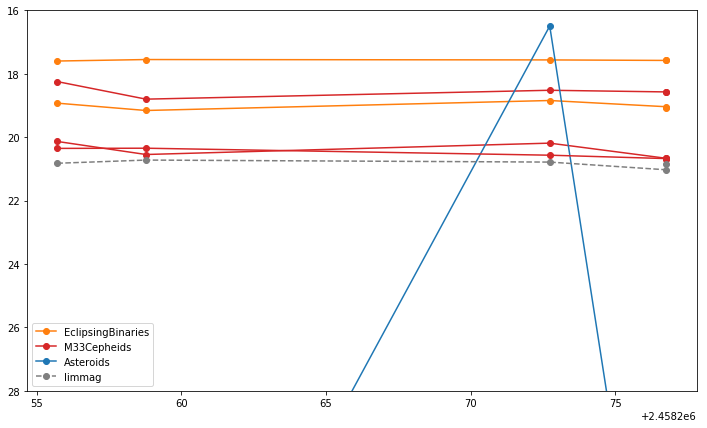

Asteroids
EclipsingBinaries
EmptyLightCurve
M33Cepheids
NonVariable
RRLyrae


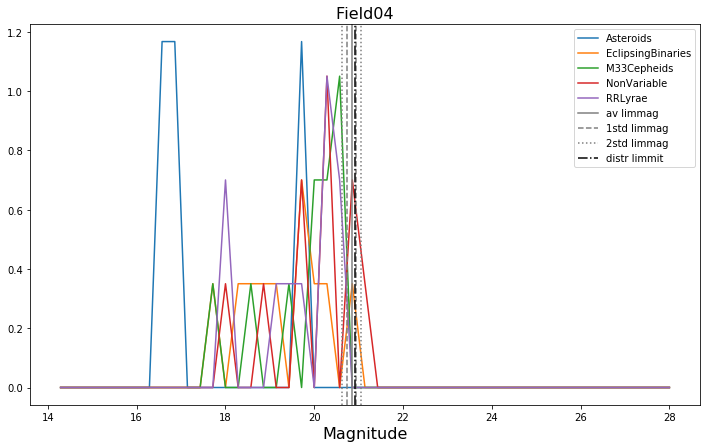

----- Field05 -----
classes: ['Asteroids', 'EclipsingBinaries', 'EmptyLightCurve', 'M33Cepheids', 'NonVariable', 'RRLyrae']
n_lc class Asteroids: 10
n_lc class EclipsingBinaries: 10
n_lc class EmptyLightCurve: 10
n_lc class M33Cepheids: 10
n_lc class NonVariable: 10
n_lc class RRLyrae: 10
labels shape: (60,)
example: [1. 5. 4. 1. 2. 1.]
lc_id shape: (60,)
example: [0 1 2 3 4 5]
lc_type shape: (60,)
example: ['M33Cepheids' 'Asteroids' 'EmptyLightCurve' 'M33Cepheids'
 'EclipsingBinaries' 'M33Cepheids']


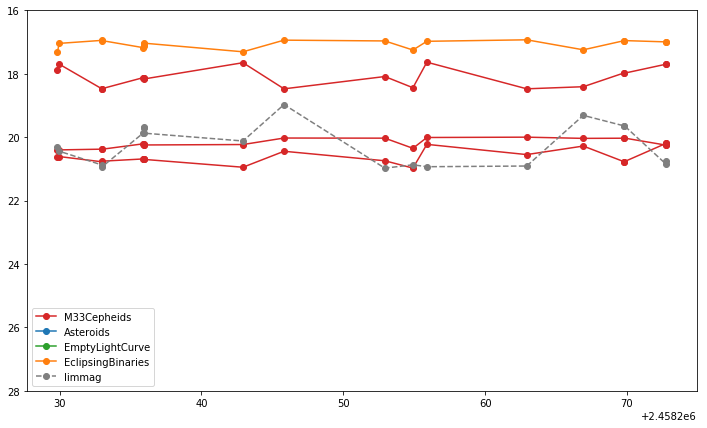

Asteroids
EclipsingBinaries
EmptyLightCurve
M33Cepheids
NonVariable
RRLyrae


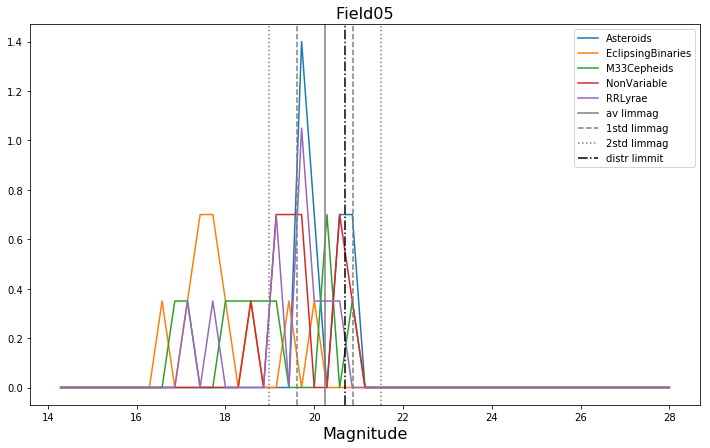

----- Field06 -----
classes: ['Asteroids', 'EclipsingBinaries', 'EmptyLightCurve', 'M33Cepheids', 'NonVariable', 'RRLyrae']
n_lc class Asteroids: 10
n_lc class EclipsingBinaries: 10
n_lc class EmptyLightCurve: 10
n_lc class M33Cepheids: 10
n_lc class NonVariable: 10
n_lc class RRLyrae: 10
labels shape: (60,)
example: [3. 4. 0. 3. 0. 2.]
lc_id shape: (60,)
example: [0 1 2 3 4 5]
lc_type shape: (60,)
example: ['NonVariable' 'EmptyLightCurve' 'RRLyrae' 'NonVariable' 'RRLyrae'
 'EclipsingBinaries']


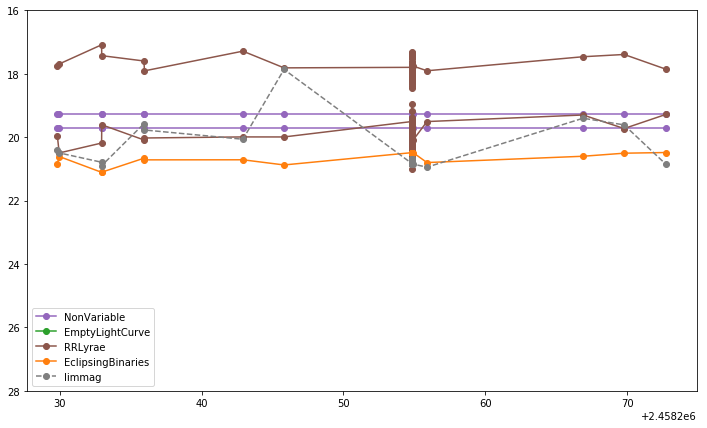

Asteroids
EclipsingBinaries
EmptyLightCurve
M33Cepheids
NonVariable
RRLyrae


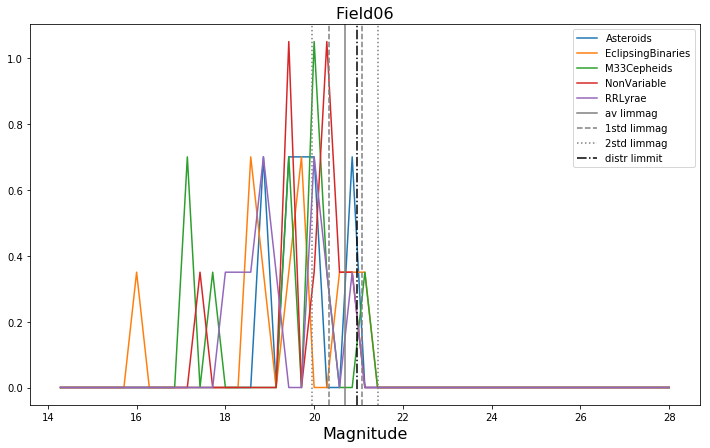

----- Field07 -----
classes: ['Asteroids', 'EclipsingBinaries', 'EmptyLightCurve', 'M33Cepheids', 'NonVariable', 'RRLyrae']
n_lc class Asteroids: 10
n_lc class EclipsingBinaries: 10
n_lc class EmptyLightCurve: 10
n_lc class M33Cepheids: 10
n_lc class NonVariable: 10
n_lc class RRLyrae: 10
labels shape: (60,)
example: [2. 0. 3. 2. 3. 0.]
lc_id shape: (60,)
example: [0 1 2 3 4 5]
lc_type shape: (60,)
example: ['EclipsingBinaries' 'RRLyrae' 'NonVariable' 'EclipsingBinaries'
 'NonVariable' 'RRLyrae']


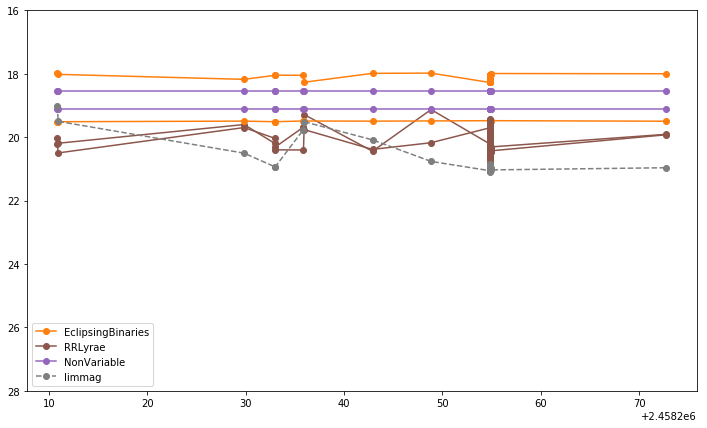

Asteroids
EclipsingBinaries
EmptyLightCurve
M33Cepheids
NonVariable
RRLyrae


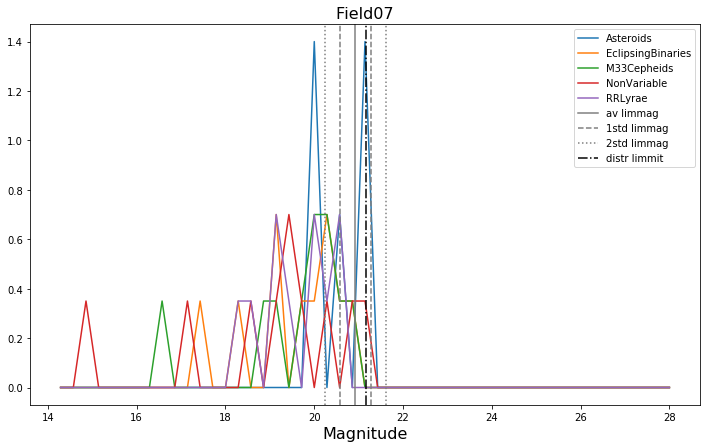

----- Field08 -----
classes: ['Asteroids', 'EclipsingBinaries', 'EmptyLightCurve', 'M33Cepheids', 'NonVariable', 'RRLyrae']
n_lc class Asteroids: 10
n_lc class EclipsingBinaries: 10
n_lc class EmptyLightCurve: 10
n_lc class M33Cepheids: 10
n_lc class NonVariable: 10
n_lc class RRLyrae: 10
labels shape: (60,)
example: [0. 5. 5. 3. 3. 0.]
lc_id shape: (60,)
example: [0 1 2 3 4 5]
lc_type shape: (60,)
example: ['RRLyrae' 'Asteroids' 'Asteroids' 'NonVariable' 'NonVariable' 'RRLyrae']


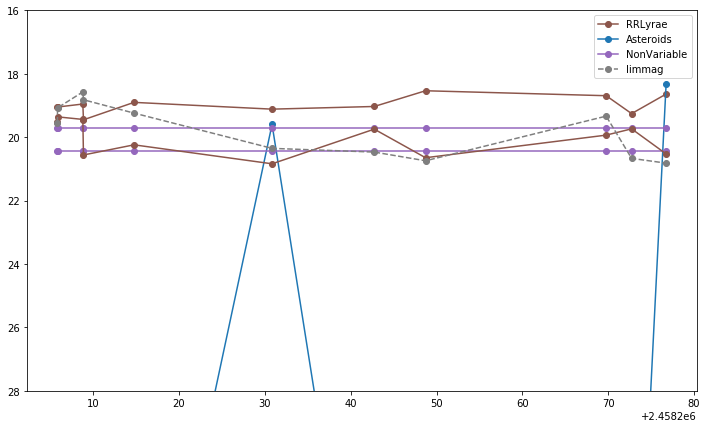

Asteroids
EclipsingBinaries
EmptyLightCurve
M33Cepheids
NonVariable
RRLyrae


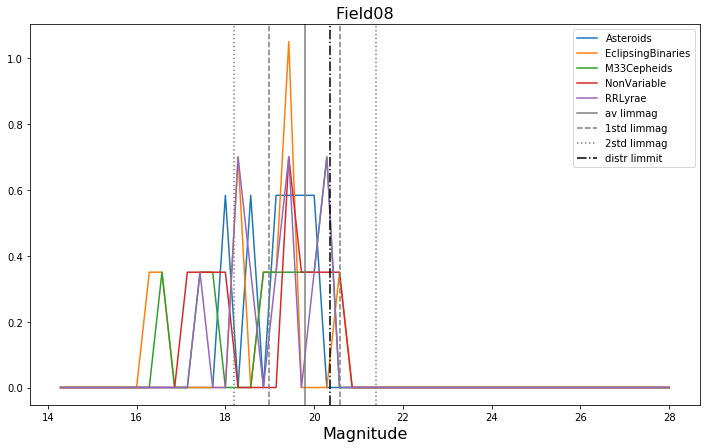

----- Field09 -----
classes: ['Asteroids', 'EclipsingBinaries', 'EmptyLightCurve', 'M33Cepheids', 'NonVariable', 'RRLyrae']
n_lc class Asteroids: 10
n_lc class EclipsingBinaries: 10
n_lc class EmptyLightCurve: 10
n_lc class M33Cepheids: 10
n_lc class NonVariable: 10
n_lc class RRLyrae: 10
labels shape: (60,)
example: [0. 5. 2. 4. 4. 5.]
lc_id shape: (60,)
example: [0 1 2 3 4 5]
lc_type shape: (60,)
example: ['RRLyrae' 'Asteroids' 'EclipsingBinaries' 'EmptyLightCurve'
 'EmptyLightCurve' 'Asteroids']


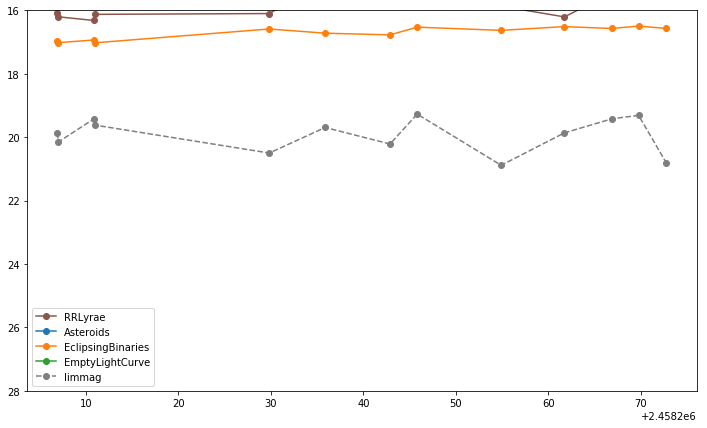

Asteroids
EclipsingBinaries
EmptyLightCurve
M33Cepheids
NonVariable
RRLyrae


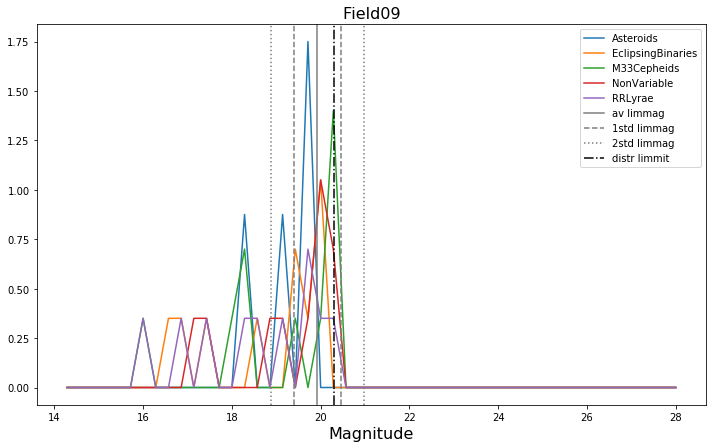

----- Field10 -----
classes: ['Asteroids', 'EclipsingBinaries', 'EmptyLightCurve', 'M33Cepheids', 'NonVariable', 'RRLyrae']
n_lc class Asteroids: 10
n_lc class EclipsingBinaries: 10
n_lc class EmptyLightCurve: 10
n_lc class M33Cepheids: 10
n_lc class NonVariable: 10
n_lc class RRLyrae: 10
labels shape: (60,)
example: [1. 3. 5. 5. 0. 0.]
lc_id shape: (60,)
example: [0 1 2 3 4 5]
lc_type shape: (60,)
example: ['M33Cepheids' 'NonVariable' 'Asteroids' 'Asteroids' 'RRLyrae' 'RRLyrae']


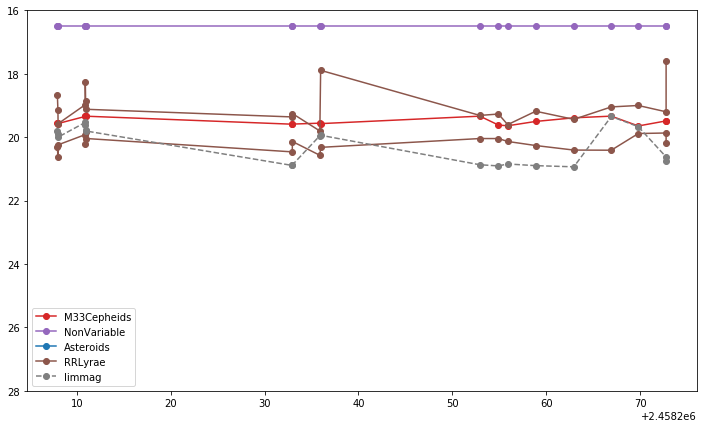

Asteroids
EclipsingBinaries
EmptyLightCurve
M33Cepheids
NonVariable
RRLyrae


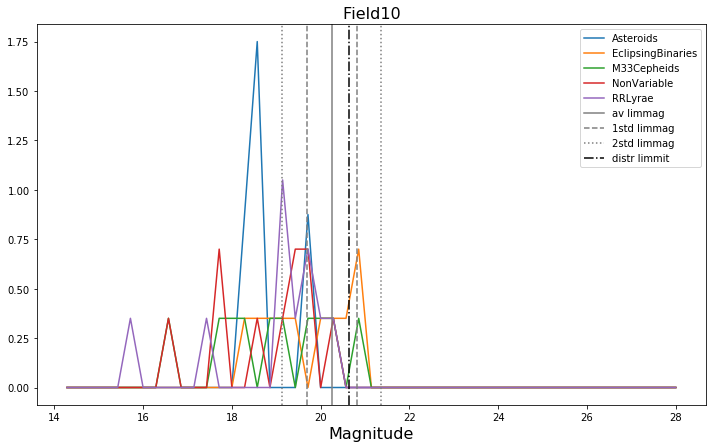

In [6]:
fields = list(data.keys())
for field in fields[:10]:
    print("----- "+field+" -----")
    plot_field_data(data[field], field_name=field, n_examples=6)

In [41]:
str("Asteroids") in str(["Asteroids, Supernovae"])

True

In [35]:
"a" in ["ad", "b", "c"]

False